In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
txt_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/code/XacDinhBienSoXeMay/yolov7/runs/detect/exp6/labels/test1.txt"
with open(txt_path, "r") as f:
  datas = f.readlines()

In [3]:
infor = datas[0][2:-1]
list_loc = np.array(infor.split(" "), dtype=np.float32)
list_loc.reshape(1,4)

array([[0.475817, 0.547304, 0.379085, 0.226961]], dtype=float32)

In [4]:
img_path = "/content/drive/MyDrive/NhanDienBienSoXeMay/data/PersonalTest/test1.jpg"
img = cv2.imread(img_path)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [5]:
h, w, d = img.shape
# h = 640
# w = 640
padw = 0
padh = 0

In [6]:
from numpy.core.memmap import dtype
x = np.copy(list_loc)
y = np.array(x, dtype="int")
y[0] = round(w * (x[0] - x[2] / 2) + padw)  # top left x
y[1] = round(h * (x[1] - x[3] / 2) + padh)  # top left y
y[2] = round(w * (x[0] + x[2] / 2) + padw)  # bottom right x
y[3] = round(h * (x[1] + x[3] / 2) + padh)  # bottom right y

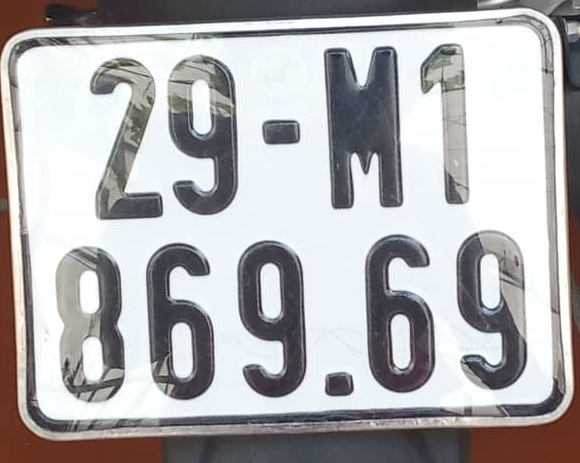

In [7]:
size = (w,h)
resize_img = cv2.resize(img, size)
crop_img = resize_img[y[1]:y[3], y[0]:y[2]]
cv2_imshow(crop_img)

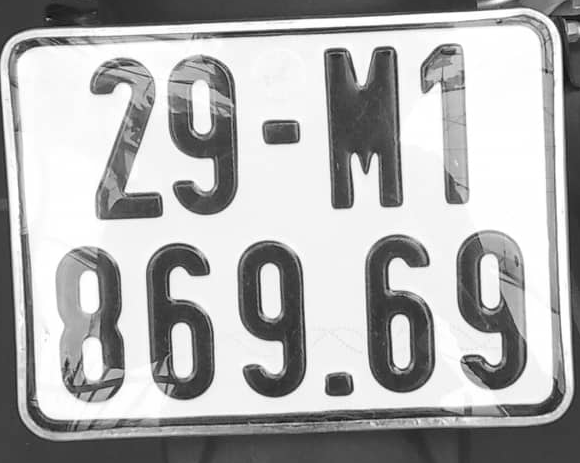

In [8]:
gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [9]:
X = gray.reshape((gray.shape[0]*gray.shape[1], 1))

In [10]:
print(X)

[[58]
 [58]
 [58]
 ...
 [62]
 [63]
 [63]]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]
[236.62845852]
[82.94224746]


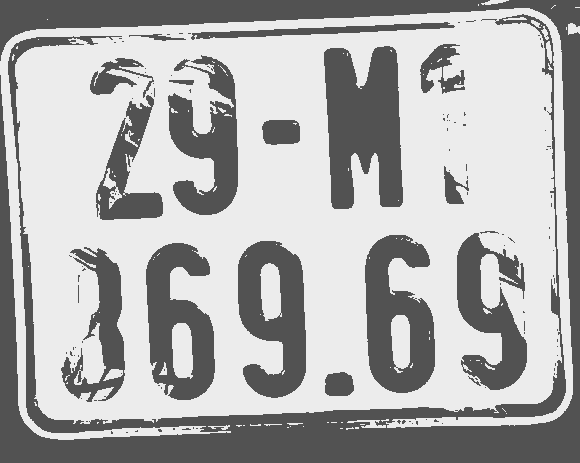

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]
[245.78499521]
[71.97604335]
[159.58203911]


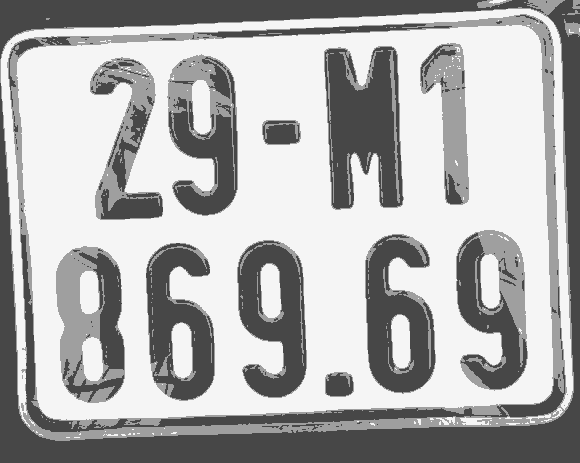

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]
[246.4004298]
[66.65331303]
[116.60357048]
[176.38309618]


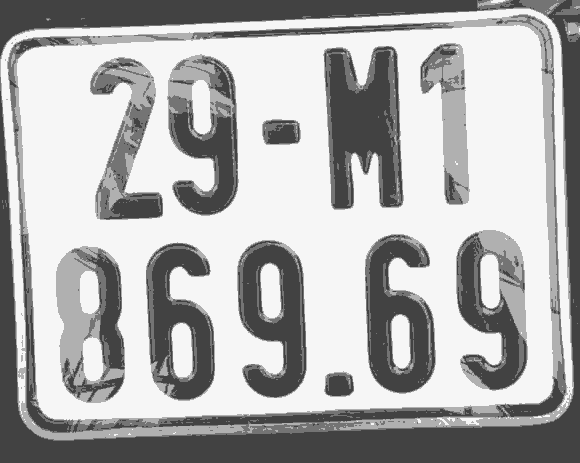

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
[64.47161362]
[246.613104]
[140.69072574]
[183.64122655]
[98.58453237]


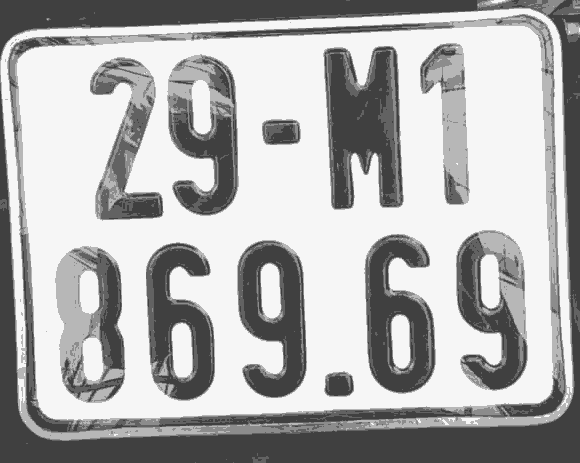

In [11]:
for K in [2, 3, 4, 5]:
  kmeans = KMeans(n_clusters=K).fit(X)
  label = kmeans.predict(X)

  print(label)

  img4 = np.zeros_like(X)
  # replace each pixel by its center
  for k in range(K):
    print(kmeans.cluster_centers_[k])
    img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((gray.shape[0],gray.shape[1], 1))

  cv2_imshow(img5)

In [12]:
def gray_img_binarization(gray, K = 4):

  # bilateral = cv2.bilateralFilter(gray, 10, 35, 25)
  X = gray.reshape((gray.shape[0]*gray.shape[1], 1))
  kmeans = KMeans(n_clusters=K).fit(X)
  label = kmeans.predict(X)

  idx = np.argmax(kmeans.cluster_centers_[:])
  ret = int(min(X[label == idx])) - 1
  print(ret)
  ret, thresh = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)

  return thresh

In [13]:
img_list = []
for k in [2, 3, 5, 7, 9]:
  # cv2_imshow(cv2.resize(src=gray_img_binarization(gray, K=k), dsize=(150, 150)))
  img_list.append(cv2.resize(src=gray_img_binarization(gray, K=k), dsize=(150, 150)))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


159


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


202


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


215


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


225


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


247


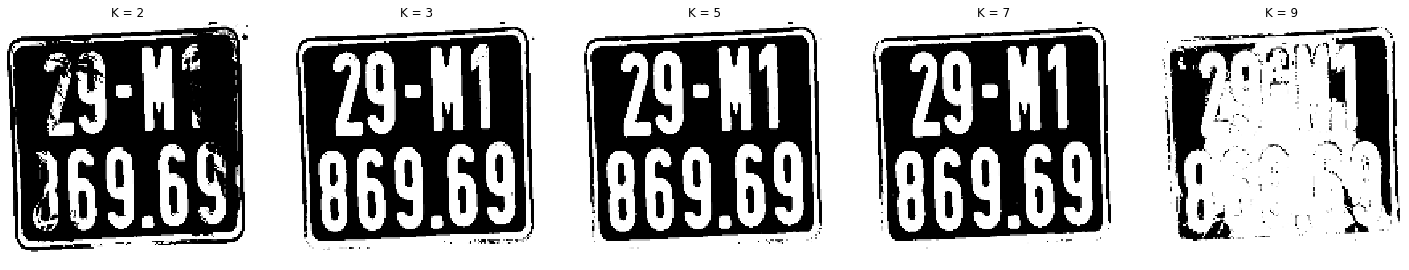

In [14]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 10))
for ax, image, label in zip(axes, img_list, [2, 3, 5, 7, 9]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"K = {label}")

In [38]:
def crop_sample(img, list_point, sample_size=(30, 60)):
  sample = []
  for point in list_point:
    area = cv2.resize(img[point[1]:point[3], point[0]:point[2]],sample_size, interpolation=cv2.INTER_AREA)
    exchange_range = cv2.bitwise_not(area)
    # cv2.imshow("Exchange image",area)
    # print(point, ((point[3]-point[1]) / (point[2] - point[0])))
    # cv2.waitKey(0)
    sample.append(exchange_range)
  return sample

def reoder_sample(list_point, list_center_y):
  thres = sum(list_center_y) // len(list_center_y)
  list_top_row = []
  list_down_row = []

  for point in list_point:
    if (point[1] + point[3]) // 2 < thres:
      list_top_row.append(point)
    else:
      list_down_row.append(point)

  list_point = sorted(list_top_row, key=lambda x:x[0]) + sorted(list_down_row, key=lambda x:x[0])
  return list_point

def gray_img_binarization(img, K = 5):

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X = gray.reshape((gray.shape[0]*gray.shape[1], 1))
  kmeans = KMeans(n_clusters=K).fit(X)
  label = kmeans.predict(X)

  idx = np.argmax(kmeans.cluster_centers_[:])
  ret = int(min(X[label == idx]))
  print(ret)
  ret, thresh = cv2.threshold(gray, ret, 255, cv2.THRESH_BINARY)

  return thresh

def filter_img_and_binarization(img):

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # blur = cv2.GaussianBlur(gray, ksize=(3,3), sigmaX=cv2.BORDER_DEFAULT)
  bilateral = cv2.bilateralFilter(gray, 10, 35, 25)
  ret, thres = cv2.threshold(bilateral, 185, 255, cv2.THRESH_BINARY)
  return thres

def show_img_seg(list_img):

  _, axes = plt.subplots(nrows=1, ncols=len(list_img), figsize=(40, 15))
  for ax, image, label in zip(axes, list_img, range(len(list_img))):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"loc = {label}")

def image_processing(img, sample_size=(60, 30)):

  # thres = filter_img_and_binarization(img)
  thres = gray_img_binarization(img, K = 3)
  contours, hierarchies = cv2.findContours(thres, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  # cv2.imshow("Thershold",thres)
  # sample = []
  list_point = []
  list_center_y = []
  for ct in contours:

    min_x, min_y, max_x, max_y = thres.shape[1], thres.shape[0], 0, 0
    for point in ct:
      min_x = min(min_x, point[0][0])
      min_y = min(min_y, point[0][1])
      max_x = max(max_x, point[0][0])
      max_y = max(max_y, point[0][1])
    
    acspect = ((max_x - min_x) * (max_y - min_y)) / (thres.shape[1] * thres.shape[0])

    if acspect >= 0.015 and acspect <= 0.07 and (max_x - min_x) < (max_y - min_y) and ((max_y-min_y) / (max_x - min_x)) <= 4.5:
      list_point.append((min_x, min_y, max_x, max_y))
      list_center_y.append((min_y + max_y) // 2)

  reoder_list = reoder_sample(list_point, list_center_y)
  return crop_sample(thres, reoder_list, sample_size)

In [22]:
sample = image_processing(img=crop_img)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


203


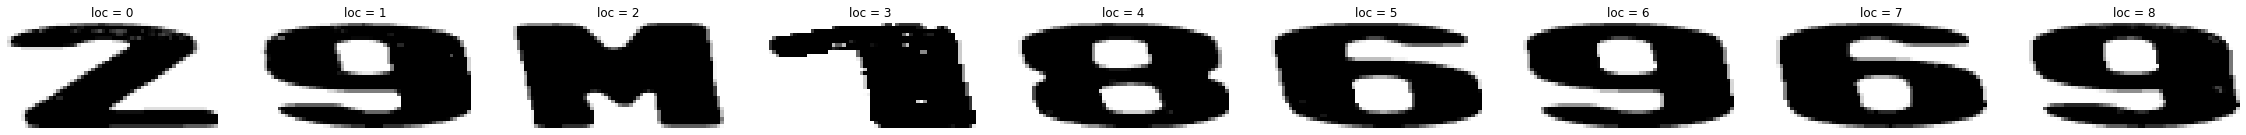

In [39]:
show_img_seg(sample)